### ♠ Binary Search Tree 原理 ♠ 

Binary Search Tree是所謂的二元搜尋樹，

同時也是資料結構的一種。

而一棵正確的binary search tree需要符合一些條件:

* 樹根的左節點只會存在比他小或相等的值

* 樹根的右節點只會存在比他大的值

    也就是說binary search tree 一定不會出現左節點大於右子樹的情況。

* 每個節點底下一定只會有小於或等於兩個子節點



### ♠ Binary Search Tree 的時間複雜度 ♠ 

* Space 空間 
      Average: O(n) 
      Worst: O(n)
      
* Search 搜尋
      Average: O(log n)	
      Worst: O(n)
      
* Insert 插入
      Average: O(log n)	
      Worst: O(n)
      
* Delete 刪除
      Average: O(log n)	
      Worst: O(n)

### ♠ Binary Search Tree 的一些想法 ♠ 

首先我先在紙上寫了BST的幾個過程，

並且按照慣例把我有想到的條件限制等先寫下來等等。

同時在打程式之前，我有先上網找講解整個Binary Search Tree的影片，

因為老師這次上課給我們看的影片裡面比較多程式碼範例，

所以我決定還是先上網自己找講解的教材。


### ♠ 寫在紙上的想法如下 ♠ 

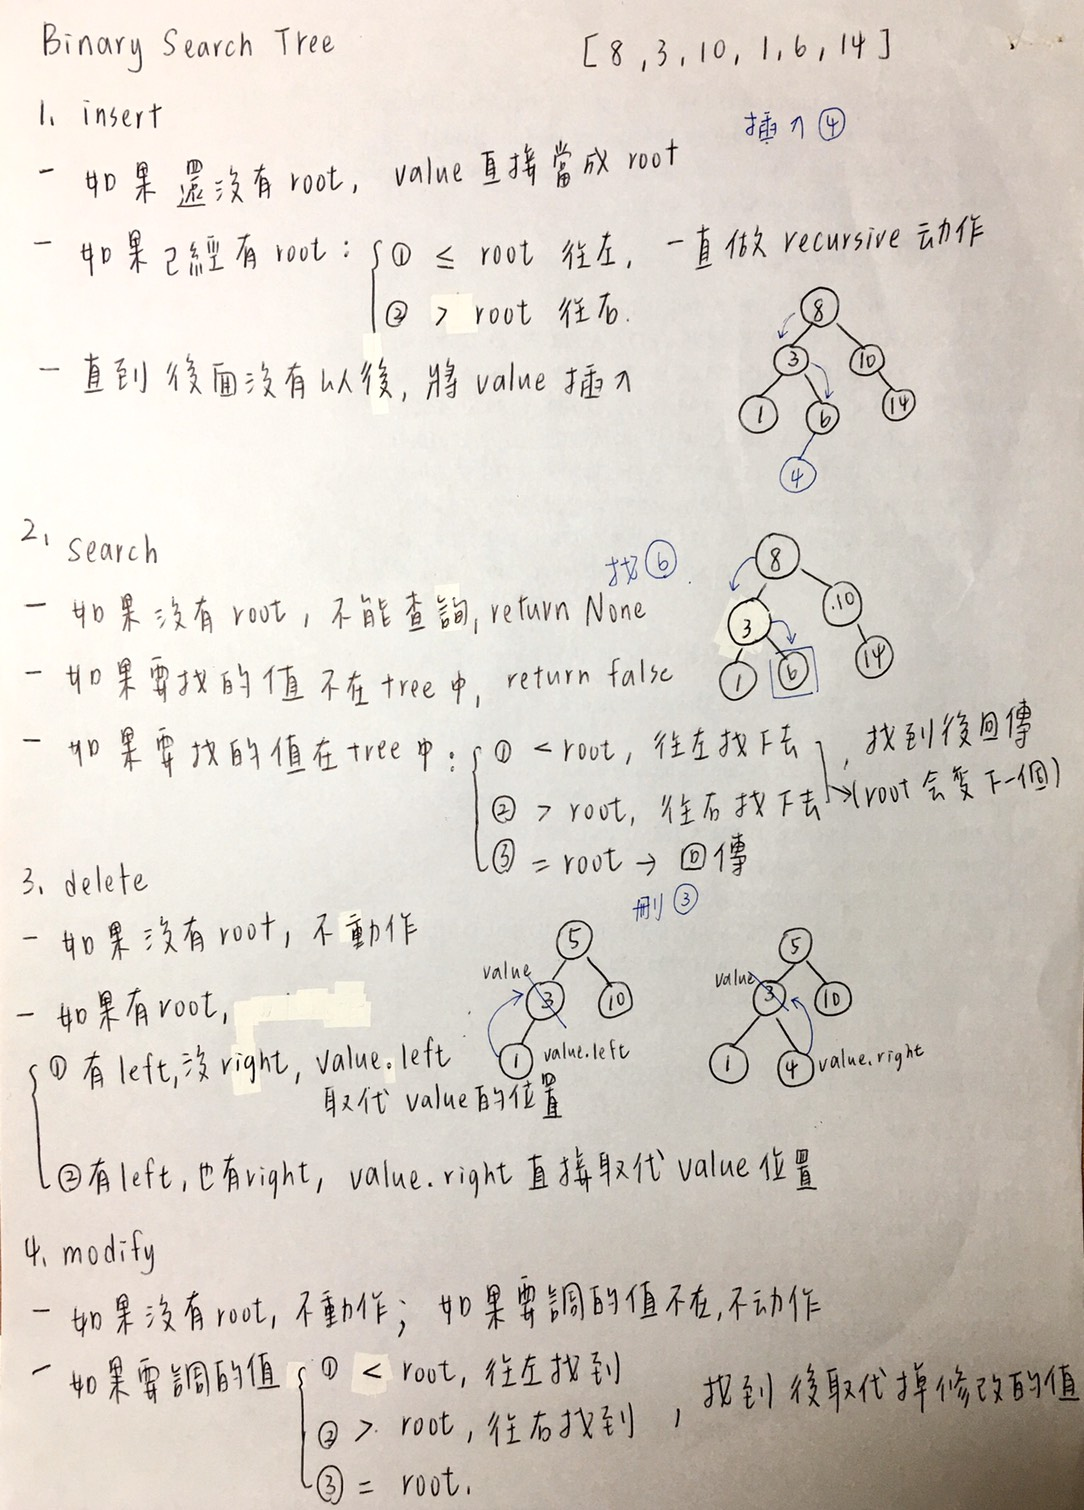

In [1]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/binary_search_tree_thinking.jpg")

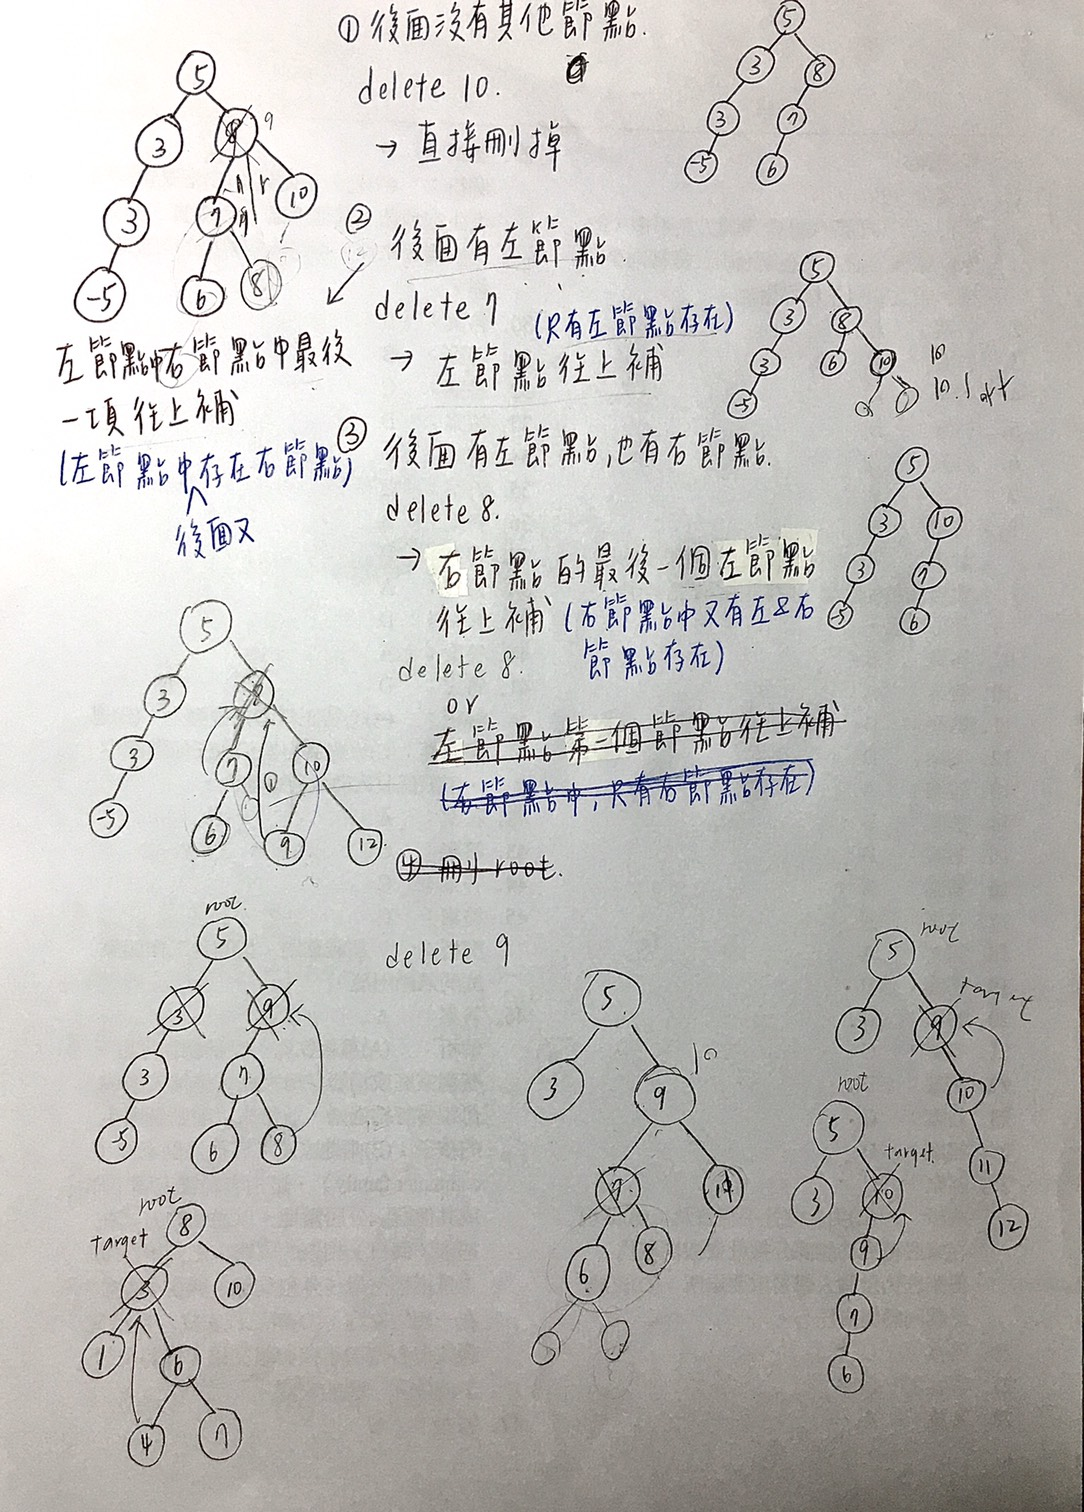

In [22]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/binary_search_tree_thinking2.jpg")

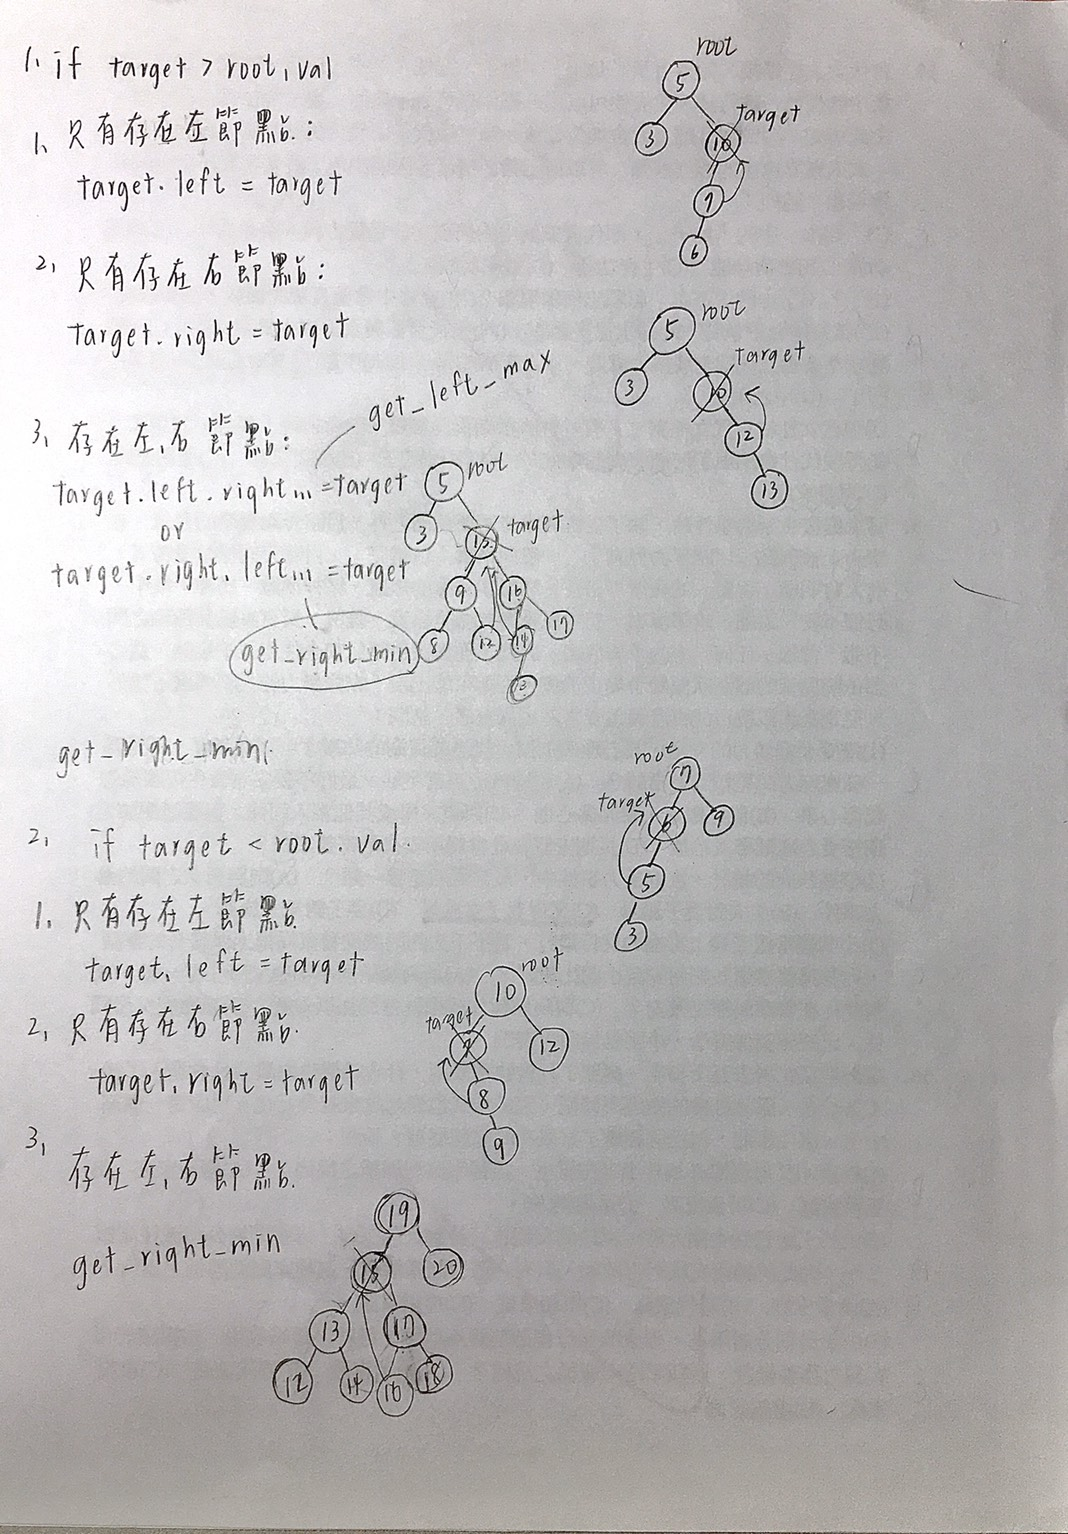

In [23]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/binary_search_tree_thinking3.jpg")

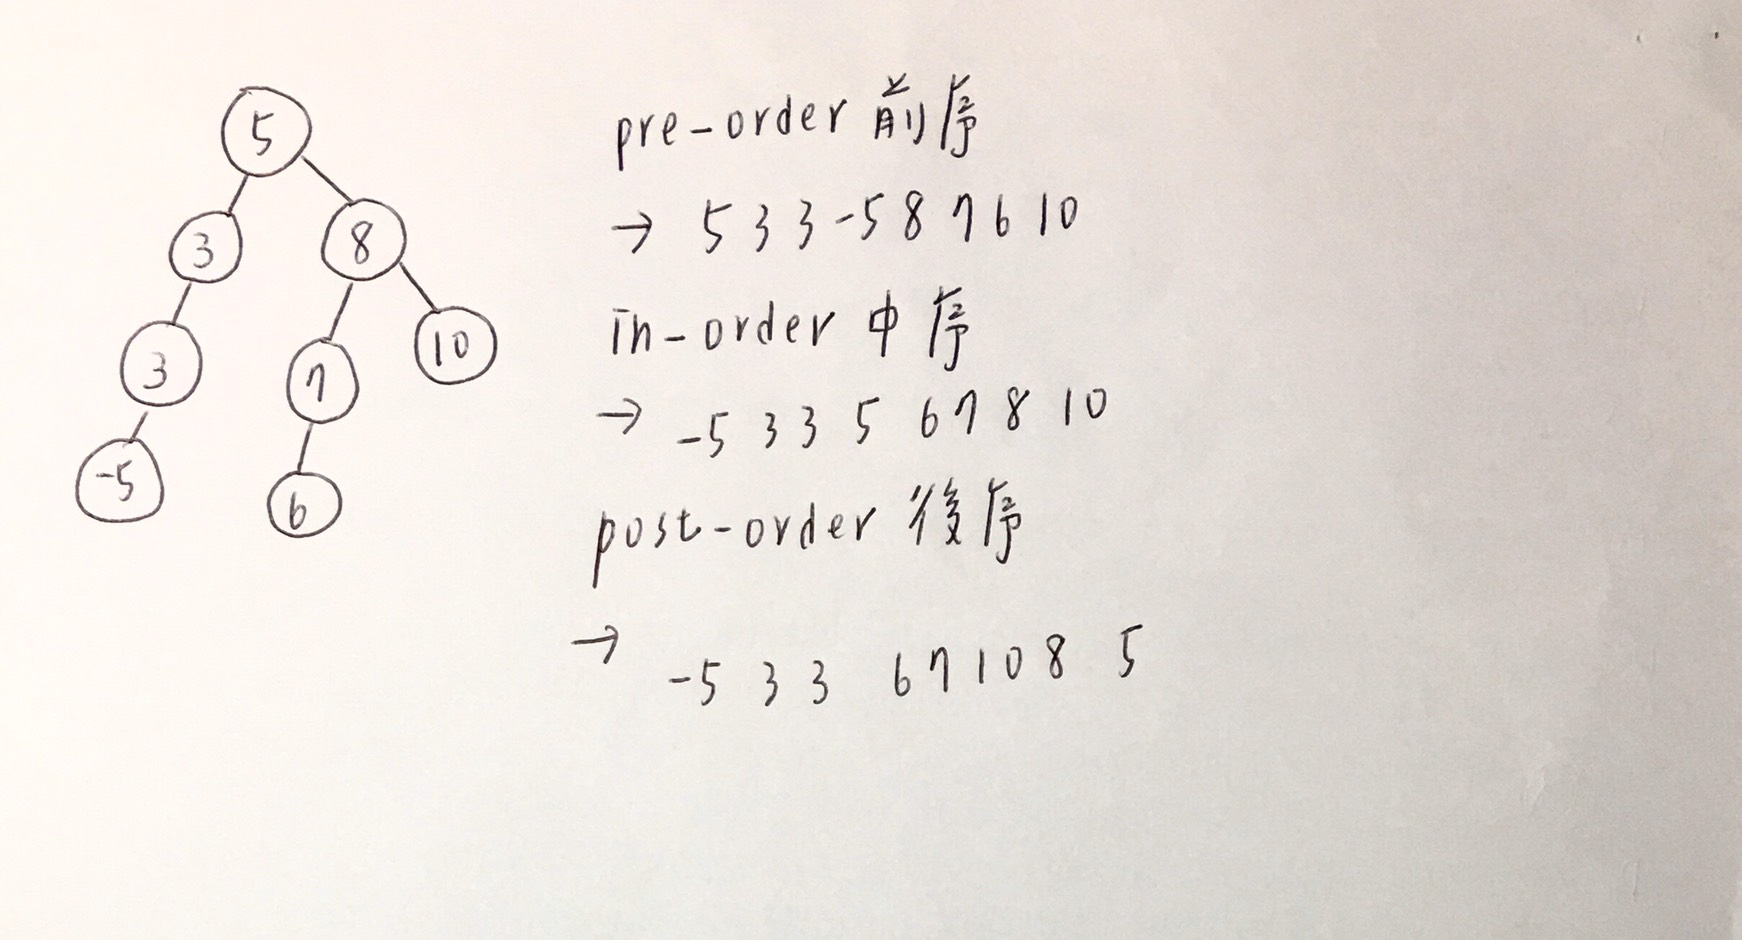

In [24]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/binary_search_tree_thinking4.jpg")

### ♠ 接著是各個功能流程圖的部分 ♠ 

(以下流程圖在功能說明中也有放上去)

### ♦ Insert 新增 ♦

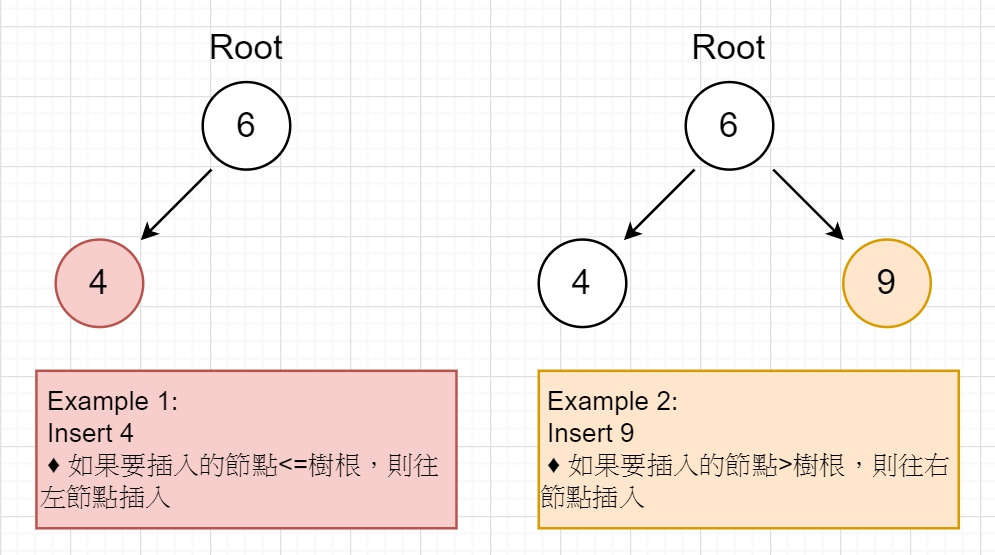

In [25]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/insert_ex.jpg")

### ♦ Search 查詢 ♦

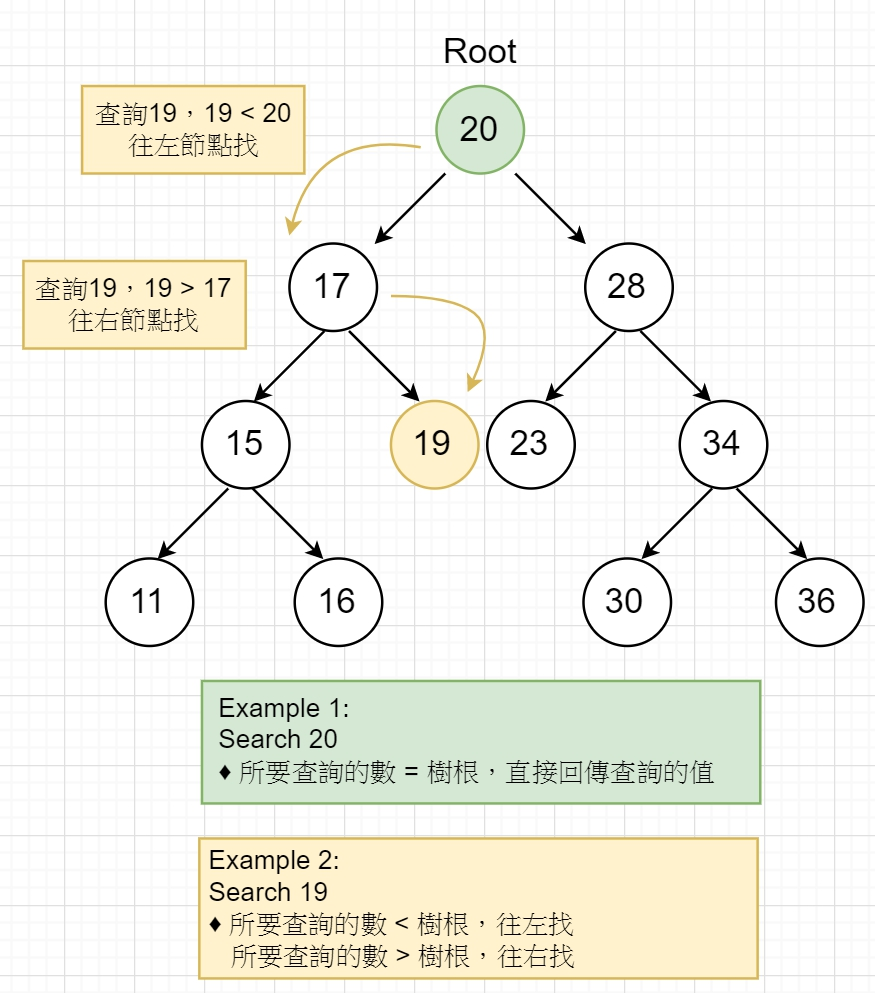

In [26]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/search_ex.jpg")

### ♦ Delete 刪除 ♦

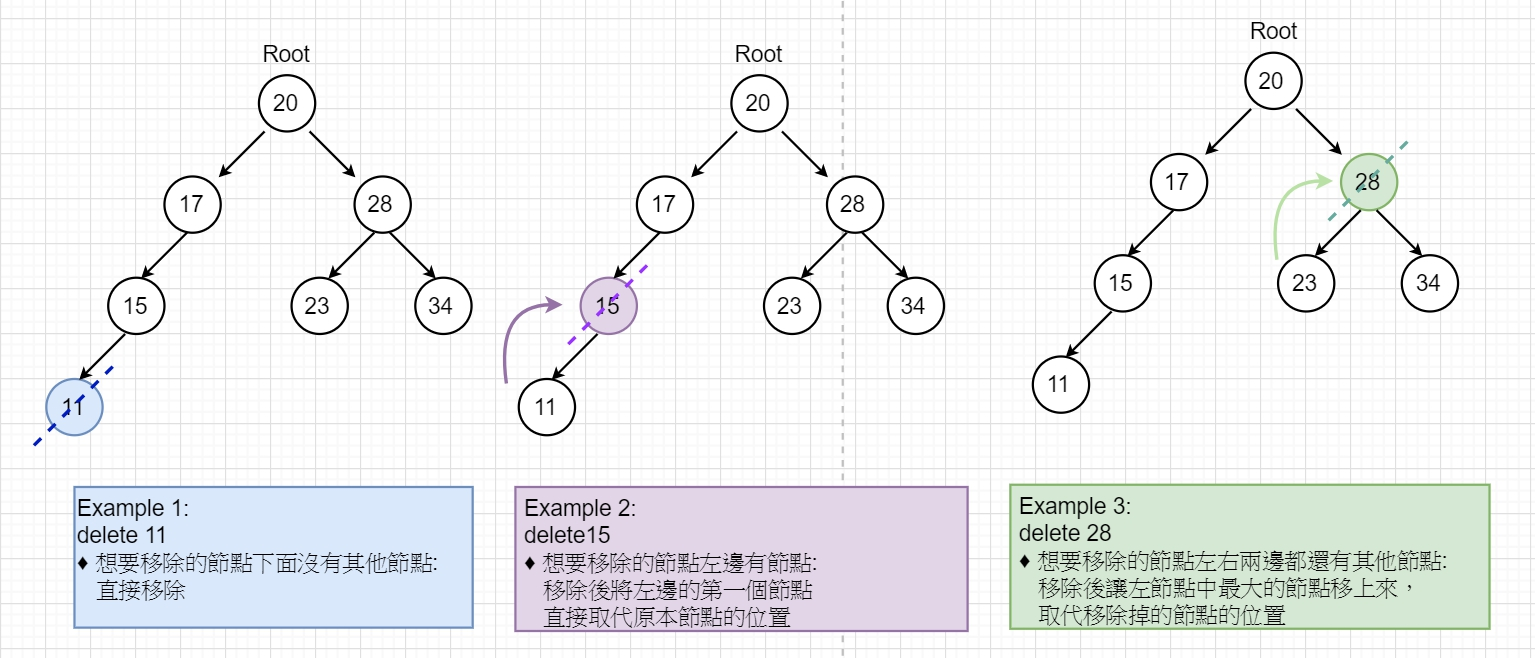

In [27]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/delete_ex.jpg")

### ♦ Modify 修改 ♦

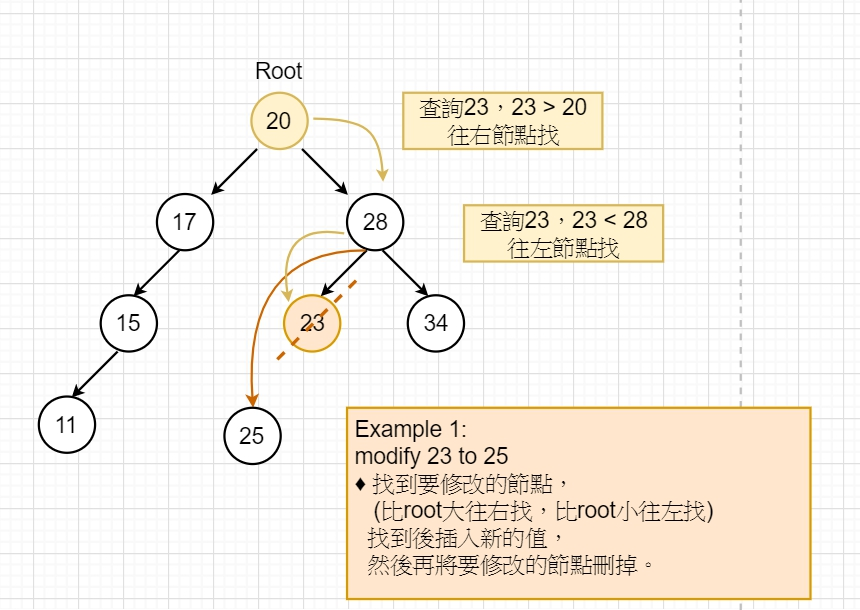

In [28]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/modify_ex.jpg")

### Step 1

我選擇從我覺得最簡單的insert開始打，

我想到要insert一個數的條件有可能有，

1. 這棵樹還甚麼東西都沒有，所以直接將要插入的節點當作樹根

2. 如果要插入的節點<=樹根，則往左

3. 如果要插入的節點>樹根，則往右

然後一直到後面沒有以後，插入我們要插入的節點。
        

所以我把有沒有存在樹根，這個設為第一個條件:

1. 倘若樹根還不存在，那麼我要新插入的這個值，就是樹根。

2. 倘若這個樹根存在，那麼我就要去判斷我要新插入的值是比樹根大還是小

那麼這邊有用到老師上課提醒我們的，可以用recursive的功能，讓這個要插入的值一直去和樹根做比較大小動作，

直到比到最後，沒有再有左節點或右節點可以比較時，

那麼新插入的樹就會加在這邊。

In [4]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
        
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if self.root == None:                #當root不存在時
            self.root = self.val             #新增的樹就是root
        
        else:                                #當root存在時
            a = self.root                     #我新增的值就要去和root的值做比較
            r = a.right                      
            l = a.left                       
            if val <= a.val:                 #如果新增的值<=root的值的話，我就針對左邊節點下去找
                if l == None:               #又如果root本身沒有下面的左節點
                    l = TreeNode(val)       #那麼就將我要新增的數加進root的左節點
                    
                else:                      #如果root本身下面還有其他左節點 a.left != None
                    return Solution.insert(self,l,val)   #使用recursive的功能，再去跑
                
            else:                           #如果新增的值>root，則針對root右節點下去找
                if r == None:               #如果root右邊不存在其他節點
                    r = TreeNode(val)       #將新增的值加進右節點
                else:                       #否則使用recursive的功能，再去跑
                    return Solution.insert(self,r,val)

打完後做一個測試。

我先建立一棵簡單的樹，然後要新插入的值是4。

In [5]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 

In [6]:
print(Solution().insert(root,4)==root.left.right)

AttributeError: 'Solution' object has no attribute 'val'

### Result 1:

結果出錯了，

原因是我新增的這個值本身是int，

但要加入的應該是整個Node。

### Step 2:

所以我將其改成Node(val)，

同時再做一次測試。

In [13]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
        
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = Node(val) #應該要加的是node不是值
        else:
            a = self.root  
            r = a.right
            l = a.left
            if val <= a.val:
                if l == None:
                    l = TreeNode(val)
                else:                      #a.left != None
                    Solution.insert(self,l,val)
            else: 
                if r == None:
                    r = TreeNode(val)
                else:
                    Solution.insert(self,r,val)

In [14]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 

In [15]:
print(Solution().insert(root,4)==root.left.right)

AttributeError: 'NoneType' object has no attribute 'right'

### Result 2:

這邊又出現一個錯誤訊息，因為我不知道他說的是甚麼意思，

所以我上網查了這個錯誤訊息，

出現NoneType error，錯誤提示的是空元素，沒有對應的屬性。 


### Step 3:

因為這邊講的a是root，我不需要再去呼叫我的self，

所以我將self刪掉，並重做一次測試。

In [16]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
        
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = Node(val) #應該要加的是node不是值
        else:
            a = root
            r = a.right
            l = a.left
            if val <= a.val:
                if l == None:
                    l = TreeNode(val)
                else:                      #a.left != None
                    Solution.insert(self,l,val)
            else: 
                if r == None:
                    r = TreeNode(val)
                else:
                    Solution.insert(self,r,val)

In [17]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 

In [18]:
print(Solution().insert(root,4)==root.left.right)

True


In [19]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [20]:
print(Solution().insert(root,4)==root.left.right)

True


### Result 3:

Insert 部分做修改後，在做一次測試，成功。

照著助教在投影片上提供的測值，再做一次測試，

一樣也是成功。

### - - - - 完 成 Insert 部 分 - - - -

### Step 4:

接著我開始打Search，相對簡單一點。

我想到如果要在一個樹中搜尋其中一個值的話，

要考慮到的條件有: 

1. 倘若樹根還不存在，那麼搜尋失敗，return None。

2. 倘若這個樹根存在，那麼我就要去判斷我要找的數是大於還小於root，

        (1)如果我要搜尋的數小於root的值，我就要去判斷是否還有其他的左節點，
           如果有，那麼繼續判斷要搜尋的值跟他的大小；
           如果沒有，那麼找不到我要搜尋的值，搜尋失敗。
           
        (2)如果我要搜尋的數大於root的值，我就要去判斷是否還有其他的右節點，
           如果有，那麼繼續判斷要搜尋的值跟他的大小；
           如果沒有，那麼找不到我要搜尋的值，搜尋失敗。
           
3. 一直到我要找的數 = root 的值，就搜尋成功。

In [21]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:                      #如果要搜尋的值<root的值，往左找
                
                if l != None:                        #如果左節點存在
                    Solution.search(self,l,target)   #繼續搜尋
                            
                else:                               #如果左節點不存在
                    return None                     #搜尋失敗
                
            elif target > a.val:                #如果要搜尋的值>root的值，往右找
               
                if r != None:                   #如果右節點存在
                    Solution.search(self,r,target)   #繼續搜尋
                    
                else:                            #如果左節點不存在
                    return None                  #搜尋失敗
                
            else:                                #如果root = target，那我要找的就是他
                return Solution.search(self,root,target)      #於是回傳

打完後做個測試。

我按照助教給的測試範例，建立一棵一樣的樹，然後要搜尋的數是10。

In [24]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [25]:
print(Solution().search(root,10)==root.right.right)

RecursionError: maximum recursion depth exceeded in comparison

### Result 4:

結果!!!

### 跑進無限迴圈!!!!!!!!!

### 啊啊啊啊啊失敗。

重來一次。

### Step 5:

我發現我在這邊所想的邏輯，好像少考慮到一些狀況:

1. 當我要搜尋的數小於root的值，我就去判斷是否還有其他的左節點，

    (1) 如果有，那麼判斷要搜尋的值跟他的大小；
         ♢ 如果等於的話，那麼就找到這個值
         ♢ 如果不等於的話，那就繼續搜尋
        
    (2) 如果沒有，那麼找不到我要搜尋的值，搜尋失敗。

2. 如果我要搜尋的數大於root的值，我就要去判斷是否還有其他的右節點，
 
    (1) 如果有，那麼繼續判斷要搜尋的值跟他的大小；
         ♢ 如果等於的話，那麼就找到這個值
         ♢ 如果不等於的話，那就繼續搜尋
        
    (2) 如果沒有，那麼找不到我要搜尋的值，搜尋失敗。
    
所以我加上了上面少打的條件。

In [30]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
           
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a
    

再做一次一樣的測試，看看是不是對的。

In [31]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [32]:
print(Solution().search(root,10)==root.right.right)

False


In [33]:
print(Solution().search(root,-5)==root.left.left.left)

False


### Result 5:

我發現我跳脫出無限迴圈的窘境，

但我回傳的結果還是錯的!

只好繼續找錯。

### Step 6:

我發現應該是在使用recursive的部分出了錯，

因為當我呼叫Solution.search時，我只呼叫了一次，

但我的想法是只要左邊OR右邊還有節點存在，而我要搜尋的值不等於我的root時，我就需要在搜尋一次，

所以這邊應該要讓他return回去，它才可以一直呼叫這個recursive的動作直到搜尋完成。

In [34]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        return Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a

修改後再做一次測試。

In [35]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [36]:
print(Solution().search(root,-5)==root.left.left.left)

True


In [38]:
print(Solution().search(root,-5)==root.left.left)

False


### Result 6: 

測試結果成功。

### - - - - 完 成 Search 部 分 - - - -

### Step 7:

接著要進入到讓我痛苦的Delete部分了...QQ

我想到如果在一棵樹中，我要刪掉其中一個值的話，可能會產生一些情況:

    1. 想要移除的節點下面沒有其他節點:
       直接移除
       
    2. 想要移除的節點左邊有節點:    
       移除後將左邊的第一個節點直接取代原本節點的位置
    
    3. 想要移除的節點右邊有節點:
       移除後將右邊的第一個節點直接取代原本節點的位置
    
    4. 想要移除的節點左右兩邊都還有其他節點:
       移除後讓左節點中最大的節點(左節點中右節點的最後一項)移上來，取代移除掉的節點的位置
 
所以我先用剛剛寫好的search function找到我要刪除的值，

1. 在我要刪除的數大於root的值的情況下，我會有上面打得四個情況產生。

2. 在我要刪除的數小於root的值的情況下，我也會有上面打得四個情況產生。

3. 在我要刪除的數等於root的值的情況下，我還是會有上面打得四個情況產生。

#### ☹ 這邊還沒考慮如果遇到要刪除重複的值的狀況。

In [47]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        return Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a
    
    def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """
        
        Solution.search(self,root,target)
        
        if target > root.val:
            if TreeNode(target).right == None and TreeNode(target).left == None:     #如果左右節點都不存在
                root.left == None            #target直接刪掉變成None
                
            elif TreeNode(target).left:              #如果只有左節點存在
                 TreeNode(target).left.left = TreeNode(target)           #下一個直接取代它的位置
                
            
            
            elif TreeNode(target).right:             #如果只有右節點存在
                TreeNode(target).right.right = TreeNode(target)      #下一個直接取代它的位置
            
            else:                                    #如果左右節點都存在                
                if target.right.left.left != None:
                    Solution.get_right_min(target.right)
                else:
                    target.right.left = target
        
        elif target < root.val:
            
            if TreeNode(target).right == None and TreeNode(target).left == None:     #如果左右節點都不存在
                root.left == None            #target直接刪掉變成None
                
            elif TreeNode(target).left:              #如果只有左節點存在
                 TreeNode(target).left.left = TreeNode(target)           #下一個直接取代它的位置
                
            
            
            elif TreeNode(target).right:             #如果只有右節點存在
                TreeNode(target).right.right = TreeNode(target)      #下一個直接取代它的位置
            
            else:                                    #如果左右節點都存在                
                if target.right.left.left != None:
                    Solution.get_right_min(target.right)
                else:
                    target.right.left = target
        
        
        else:                       #target = root.val
            if TreeNode(target).right == None and TreeNode(target).left == None:     #如果左右節點都不存在
                root.left == None            #target直接刪掉變成None
                
            elif TreeNode(target).left:              #如果只有左節點存在
                 TreeNode(target).left.left = TreeNode(target)           #下一個直接取代它的位置
                
            
            
            elif TreeNode(target).right:             #如果只有右節點存在
                TreeNode(target).right.right = TreeNode(target)      #下一個直接取代它的位置
            
            else:                                    #如果左右節點都存在                
                if target.right.left.left != None:
                    Solution.get_right_min(target.right)
                else:
                    target.right.left = target
           
    
    
    
    def get_right_min(self,target_right,val):
        a = target.right              #root
        l = target.right.left
        
        if a.left != None:                         #如果root的左邊存在
            return find_min(l)                #繼續找下去
        else:                                      #如果root的左邊沒東西了
            return l                                #那就return最後找到的值
    

來做一次測試。

In [43]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [44]:
root = Solution().delete(root,3)
print(root.val == 5 and root.left.val == -5 and root.left.left == None and root.left.right == None)

AttributeError: 'NoneType' object has no attribute 'val'

### Result 7:

結果出現錯誤訊息，

於是我上網查了這項錯誤訊息的意思。

之所以會跳出這行錯誤訊息是因為，這是一個空元素，沒有對應的屬性。

回到最原始的問題，應該是我的val沒有定義好。


### Step 8:

所以我做了一些修改，

重新檢視我的每一個function與裡面定義的東西。

並且將delete的def重新寫了一次，

因為發現其實原本寫的那些是可以合併再一起的。

In [10]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
                    
        
    def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """
        
        Solution.search(self,root,target)
        
        if TreeNode(target).right == None and TreeNode(target).left == None:     #如果左右節點都不存在
            root.left == None            #target直接刪掉變成None

        elif TreeNode(target).left:              #如果只有左節點存在
             TreeNode(target).left.left = TreeNode(target)           #下一個直接取代它的位置



        elif TreeNode(target).right:             #如果只有右節點存在
            TreeNode(target).right.right = TreeNode(target)      #下一個直接取代它的位置

        else:                                    #如果左右節點都存在                
            if target.right.left.left != None:
                Solution.get_right_min(target.right)
            else:
                target.right.left = target
        
    
    
    
    def get_right_min(self,target_right,val):
        a = target.right              #root
        l = target.right.left       
        
        if a.left != None:                         #如果root的左邊存在
            return find_min(l)                #繼續找下去
        else:                                      #如果root的左邊沒東西了
            return l                                #那就return最後找到的值
        
        
        
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        return Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a
                    

再來做一次檢測，看看情況會不會好一點。

In [11]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [12]:
root = Solution().delete(root,3)
print(root.val == 5 )

AttributeError: 'NoneType' object has no attribute 'val'

### Result 8:

發現結果還是一樣，

一樣在定義上面出了問題，

但我實在不知道自己到底錯在哪，

所以我決定在delete這裡去看看pseudo code，

幫助我再重新思考過一次看看我的邏輯或是程式碼是哪邊出錯了。

### Step 9:

看完pseudo code後，我發現我還有很多狀況沒考慮周到，

例如: 我一開始是幾乎把所有的function都寫在delete裡面，

但我卻沒有完整的做到呼叫recursive的動作，自己寫到後來也有點亂掉的感覺，

所以我在delete的部份決定砍掉重來，

看完pseudo code釐清整個邏輯概念後，重新打一次。

In [13]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None                  
                    
        
    def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """

        if root == None:
            return None
        elif target == root.val:
            return Solution.delete_term(root)
        elif target < root.val:
            root.left = Solution.delete(self,root.left,target)
        else:
            root.right = Solution.delete(self,root.right,target)
        return root        
    
    def delete_term(root):
        if root.left != None and root.right != None:
            p = Solution.get_left_max(self,root.left)
            root.target = p.target
            root.left = Solution.delete(self,root.left,p)
            return root
        elif root.left != None:
            return root.left
        elif root.right != None:
            return root.right
        else:
            return None
            
    
    def get_left_max(root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(root.right)

In [18]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [19]:
root = Solution().delete(root,3)
print(root.val == 5 and root.left.val ==-5 and root.left.left == None and root.left.right == None )
print(root.right.right.val == 10 and root.right.left.val == 7 and root.right.left.left.val == 6)
print(root.right.right.right == None and root.right.right.left == None and root.right.left.right == None)
print(root.right.left.left.left == None and root.right.left.left.right == None and root.right.val == 8)

False
True
True
True


In [20]:
root = Solution().delete(root,3)
print(root.val == 5 )
print(root.right.right.val == 10 and root.right.left.val == 7 and root.right.left.left.val == 6)
print(root.right.right.right == None and root.right.right.left == None and root.right.left.right == None)
print(root.right.left.left.left == None and root.right.left.left.right == None and root.right.val == 8)

True
True
True
True


### Result 9:

我發現照著pseudo code的邏輯打程式，結果是成功的。

唯一出現的問題是，因為我寫的還是沒辦法刪除重複的值，

所以當我delete 3的時候，他只刪除了一個，

也因為這樣，這個時候root.left的值並不等於-5。

所以關於重複值的刪除這部分，我還要再進行思考跟修改，

但是這樣程式碼確實是可以執行刪除沒有重複值的。

### Step 10:

這邊我因為不知道要怎麼樣才能讓他重複刪除，

加上我已經卡三天了!!!

所以去請教了莊崴宇同學，

結果他只跟我說:

你去想，要怎樣才能讓一個東西跑出重複的值?

然後，就沒有然後了。 

嗯 ^_^ ?!


好啦反正，後來我就想說，可以用for迴圈去計算次數，

然後像之前Merge Sort一樣，把它append到一個新的list裡面，

從這邊再套進去for迴圈裡，去計算。

所以我在這邊有新增了一個def讓他走訪每個在樹裡面的值，

然後因為作業本身有要求要用pre-order，

所以就讓他用pre-order的方式走訪，

從樹根、左節點、右節點，這樣的方式加進去新list裡。

In [2]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None

    def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """  
        new_list = []
        Solution.pre_order_mode(root,new_list)
        for i in new_list:
            if i == target:
                if root == None:
                    return None
                elif target == root.val:
                    return Solution.delete_term(self,root)
                elif target < root.val:
                    root.left = Solution.delete(self,root.left,target)
                else:
                    root.right = Solution.delete(self,root.right,target)
        return root        
    
    def delete_term(self,root):
        if root.left != None and root.right != None:           #有左節點跟右節點
            p = Solution.get_left_max(root.left)
            root.target = p.target
            root.left = Solution.delete(self,root.left,p)
            return root
        elif root.left != None:                              #只有左節點
            return root.left
        elif root.right != None:                             #只有右節點
            return root.right
        else:                                                #沒有其他節點
            return None
            
    def get_left_max(root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(root.right)
            
    def pre_order_mode(root,new_list):             #使用pre_order走訪        
        if root != None:
            new_list.append(root.val)            
            Solution.pre_order_mode(root.left,new_list)
            Solution.pre_order_mode(root.right,new_list)

打完後做一個測試。

In [3]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [4]:
root = Solution().delete(root,3)
print(root.val)
print(root.left.val)
print(root.left.left)
print(root.right.val)
print(root.right.left.val)
print(root.right.left.left.val)
print(root.right.right.val)

5
-5
None
8
7
6
10


### Result 10:

我發現這樣的結果是可行的，

因為兩個3都有刪掉，所以root.left的位置會變成是-5。

### - - - - 完 成 Delete 部 分 - - - -

### Step 11:

接著我開始打Modify的部分，

這部分我真的覺得超超超超超難!

而且是那種我明明腦中已經想了很多方式跟呈現的模式，

但是不知道為甚麼打程式的時候就會一堆錯，

再不然就是在程式打到一半的時候，發現我想的甚麼甚麼根本沒辦法用程式碼的方式表現出來，

我真的覺得超崩潰。

* 我最一開始想的是，

  如果我要修改一個節點的值，我要先去找到他，然後直接把他用新的值蓋掉。

  但後來我發現，如果直接覆蓋掉，

  那我新插入的值如果不符合樹的"左邊小，右邊大"這個條件，

  這就不叫Binart Search Tree了。

  所以這個想法不行。

* 我第二個想的是，

  那如果我先找到我要修改的值，
  
  然後直接把他刪掉，
  
  接著再用Insert的方式，
  
  把我要修改的東西插入進去這個樹，
  
  這樣應該就不會有大小的問題，
  
  結果後來我發現這樣的話，
  
  假如我今天要修改的值在這棵樹裡面包含多個節點，
  
  那我一次把它刪掉，卻只新增了一個新的節點，
  
  這樣還是錯的啊啊啊啊啊...
  
  而且我這邊打程式的時候，就遇到 我想的甚麼甚麼根本沒辦法用程式碼的方式表現出來 的狀況。

In [5]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
        
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = TreeNode(val) #應該要加的是node不是值
        else:
            a = root
            r = a.right
            l = a.left
            if val <= a.val:
                if l == None:
                    l = TreeNode(val)
                else:                      #a.left != None
                    return Solution.insert(self,l,val)
            else: 
                if r == None:
                    r = TreeNode(val)
                else:
                    return Solution.insert(self,r,val)
                    
                    
        
    def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """  
        #new_list = []
        #Solution.pre_order_mode(root,new_list)
        #for i in new_list:
        #if i == target:
        if root == None:
            return None
        elif target == root.val:
            return Solution.delete_term(self,root)
        elif target < root.val:
            root.left = Solution.delete(self,root.left,target)
        else:
            root.right = Solution.delete(self,root.right,target)
        return root        
    
    def delete_term(self,root):
        if root.left != None and root.right != None:           #有左節點跟右節點
            p = Solution.get_left_max(root.left)
            root.target = p.target
            root.left = Solution.delete(self,root.left,p)
            return root
        elif root.left != None:                              #只有左節點
            return root.left
        elif root.right != None:                             #只有右節點
            return root.right
        else:                                                #沒有其他節點
            return None
        return delete(self,root,target)
    
    def get_left_max(root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(root.right)
            
    def pre_order_mode(root,new_list):             #使用pre_order走訪        
        if root != None:
            new_list.append(root.val)            
            Solution.pre_order_mode(root.left,new_list)
            Solution.pre_order_mode(root.right,new_list)

    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        return Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a
                    
                
        
        
    def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype: None Do not return anything, modify nodes(maybe more than more) in-place instead.(cannot search())
        """
        
        if root == None:
            return None
        else:        # root!=None
            Solution.search_delete(self,target)
            
            return Solution.insert(self,root,new_val)                
        
        
        
    def search_delete(self,target):
        Solution.search(self,root,target)
        if a:
            Solution.delete(self,root,target)
            return search_delete(self,target)
        else:
            pass

In [6]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [7]:
root = Solution().modify(root,7,4)
print(isBinarySearchTree(root))

NameError: name 'a' is not defined

### Result 11:

這個print出來一定是錯的，

因為我知道我的a沒定義，

只是因為我真的不知道要用甚麼方式呈現。

### Step 12:

後來我又繼續做修改，

用建一個新的list的方式，

讓我裡面的值去跑for迴圈看我要修改的值總共有幾個，

然後再刪掉我要修改的值，

接著一樣用Insert的方式把要新的值加進去。


In [8]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = TreeNode(val) #應該要加的是node不是值
        else:
            a = root
            r = a.right
            l = a.left
            if val <= a.val:
                if l == None:
                    l = TreeNode(val)
                else:                      #a.left != None
                    return Solution.insert(self,l,val)
            else: 
                if r == None:
                    r = TreeNode(val)
                else:
                    return Solution.insert(self,r,val)
                    
    def delete(self,root,target):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for i in range(len(new_list)):
            Solution.delete_term1(self,root,target)
        return root
    def delete_term1(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """  
        if root == None:
            return None
        elif target == root.val:
            return Solution.delete_term2(self,root)
        elif target < root.val:
            root.left = Solution.delete_term1(self,root.left,target)
        else:
            root.right = Solution.delete_term1(self,root.right,target)
        return root        
    
    def delete_term2(self,root):
        if root.left != None and root.right != None:           #有左節點跟右節點
            p = Solution.get_left_max(self,root.left)
            root.val = p.val
            root.left = Solution.delete_term1(self,root.left,p.val)
            return root
        elif root.left != None:                              #只有左節點
            return root.left
        elif root.right != None:                             #只有右節點
            return root.right
        else:                                                #沒有其他節點
            return None
        return delete_term1(self,root,target)
    
    def get_left_max(self,root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(self,root.right,target)
            
    def pre_order_mode(self,root,new_list,target):             #使用pre_order走訪        
        if root != None:
            if root.val==target:
                new_list.append(root.val)
            Solution.pre_order_mode(self,root.left,new_list,target)
            Solution.pre_order_mode(self,root.right,new_list,target)
            
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        return Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a
                    
                
        
        
    def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype: None Do not return anything, modify nodes(maybe more than more) in-place instead.(cannot search())
        """
        
        Solution.delete_insert(self,root,target,new_val)
        return root
        
    def delete_insert(self,root,target,new_val):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for k in (new_list):
            Solution.insert(self,root,new_val)
        return root

In [9]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [13]:
root = Solution().modify(root,7,4)
print(root.left.right.val)

AttributeError: 'NoneType' object has no attribute 'val'

### Result 12:

結果一樣又出現error，

繼續修改。

### Step 13:

將Modify部分再做一次修改。

In [15]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = TreeNode(val) #應該要加的是node不是值
        else:
            a = root
            r = a.right
            l = a.left
            if val <= a.val:
                if l == None:
                    l = TreeNode(val)
                    #return l
                else:                      #a.left != None
                    return Solution.insert(self,l,val)
            else: 
                if r == None:
                    r = TreeNode(val)
                    #return r
                else:
                    return Solution.insert(self,r,val)
                    
    def delete(self,root,target):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for i in range(len(new_list)):
            Solution.delete_term1(self,root,target)
        return root
    def delete_term1(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """  
        if root == None:
            return None
        elif target == root.val:
            return Solution.delete_term2(self,root)
        elif target < root.val:
            root.left = Solution.delete_term1(self,root.left,target)
        else:
            root.right = Solution.delete_term1(self,root.right,target)
        return root
                
    
    def delete_term2(self,root):
        if root.left != None and root.right != None:           #有左節點跟右節點
            p = Solution.get_left_max(self,root.left)
            root.val = p.val
            root.left = Solution.delete_term1(self,root.left,p.val)
            return root
        elif root.left != None:                              #只有左節點
            return root.left
        elif root.right != None:                             #只有右節點
            return root.right
        else:                                                #沒有其他節點
            return None
        return delete_term1(self,root,target)
    
    def get_left_max(self,root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(self,root.right,target)
            
    def pre_order_mode(self,root,new_list,target):             #使用pre_order走訪        
        if root != None:
            if root.val==target:
                new_list.append(root.val)
            Solution.pre_order_mode(self,root.left,new_list,target)
            Solution.pre_order_mode(self,root.right,new_list,target)
        return new_list
            
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:
            a = root
            l = a.left
            r = a.right
            if target < a.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if l.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,l,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return l 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > a.val:   #target >root.val往右邊找
               
                if r != None:
                    if r.val != target:
                        return Solution.search(self,r,target)                 
                    else:
                        return r
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return a
                            
        
        
    def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype: None Do not return anything, modify nodes(maybe more than more) in-place instead.(cannot search())
        """
        
        Solution.delete_insert(self,root,target,new_val)
        return root

        
    def delete_insert(self,root,target,new_val):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        Solution.delete(self,root,target)
        for k in range (int(len(new_list))):
            return Solution.insert(self,root,new_val)
     

In [16]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [17]:
root = Solution().modify(root,7,4)
print(root.left.right.val)

AttributeError: 'NoneType' object has no attribute 'val'

### Result 13:

結果還是一樣的問題QQ

好煩啊啊啊啊啊!

### Step 14:

所以我決定新訂一個Class專門來走訪一次Modify的結果，

看看我的錯到底是在哪裡。

In [18]:
class bst(object):
    def preorder(self,root):
        if root:
            print(root.val)
            bst.preorder(self,root.left)
            bst.preorder(self,root.right)

In [20]:
root = Solution().modify(root,7,4)
bst().preorder(root)

5
3
3
-5
8
6
10


### Result 14:

我發現其實我是有刪掉要修改的值，

但是我卻沒有成功Insert進去。

所以我決定從Insert function的地方開始找錯。

### Step 15:

過程中真的試了一堆方法，

結果都還是一樣的結果，

一直出現 'NoneType' object has no attribute 'val'這類的error，

我覺得到這邊我有點打到頭腦亂掉，

也對我的程式碼看到後來有點不瞭解自己到底在打甚麼了...


所以我決定整個來隨便改，

把它全部變成最簡單的方式，

那些不必要的代碼或是感覺是多餘的def甚麼的，

我都不要讓他出現在我的code裡面。

In [23]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = TreeNode(val) 
        else:
            if val <= root.val:
                if root.left == None:
                    root.left = TreeNode(val)
                    return root.left
                else:                      #root.left != None
                    return Solution.insert(self,root.left,val)
            else: 
                if root.right == None:
                    root.right = TreeNode(val)
                    return root.right
                else:
                    return Solution.insert(self,root.right,val)
                    
    def delete(self,root,target):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for i in range(len(new_list)):
            Solution.delete_term1(self,root,target)
        return root
    
    def delete1(self,root,target,new_val):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for i in range(len(new_list)):
            Solution.delete_term1(self,root,target)
            return root
    
    def delete_term1(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """  
        if root == None:
            return None
        elif target == root.val:
            return Solution.delete_term2(self,root)
        elif target < root.val:
            root.left = Solution.delete_term1(self,root.left,target)
        else:
            root.right = Solution.delete_term1(self,root.right,target)
        return root
                
    
    def delete_term2(self,root):
        if root.left != None and root.right != None:           #有左節點跟右節點
            p = Solution.get_left_max(self,root.left)
            root.val = p.val
            root.left = Solution.delete_term1(self,root.left,p.val)
            return root
        elif root.left != None:                              #只有左節點
            return root.left
        elif root.right != None:                             #只有右節點
            return root.right
        else:                                                #沒有其他節點
            return None
        return delete_term1(self,root,target)
    
    def get_left_max(self,root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(self,root.right,target)
            
    def pre_order_mode(self,root,new_list,target):             #使用pre_order走訪        
        if root != None:
            if root.val==target:
                new_list.append(root.val)
            Solution.pre_order_mode(self,root.left,new_list,target)
            Solution.pre_order_mode(self,root.right,new_list,target)
        return new_list
            
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:

            if target < root.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if root.left.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,root.left,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return root.left 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > root.val:   #target >root.val往右邊找
               
                if root.right != None:
                    if root.right.val != target:
                        return Solution.search(self,root.right,target)                 
                    else:
                        return root.right
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return root
                            
        
        
    def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype: None Do not return anything, modify nodes(maybe more than more) in-place instead.(cannot search())
        """
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        Solution.delete(self,root,target)
        for k in range (int(len(new_list))):
            Solution.insert(self,root,new_val)
        return root
    

這邊我把在insert以及search所設定的代碼那些:
    
    a = root
    l = root.left
    r = root.right
    
以及我在modify下面原先多設定的一個def也都拿掉，

把他直接寫進modify裡面。

接著再做一組測試。

In [24]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [26]:
root = Solution().modify(root,7,4)

看看我有沒有成功delete掉原先的值，

並且成功insert進去新的值。

In [28]:
print(root.left.right.val)
print(root.right.left.val)

4
6


### Result 15:

## 結 果 終 於 成 功 了 !

嗚嗚嗚嗚真的太感動了TAT

### - - - - 完 成 Modify 部 分 - - - -

### Step 16:

### - - Last Check - - 

這邊做最後的確認，

看看我的程式碼跟助教放在投影片上的測試範例出來是不是一樣的結果。

In [48]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root == None:
            root = TreeNode(val) 
        else:
            if val <= root.val:
                if root.left == None:
                    root.left = TreeNode(val)
                    return root.left
                else:                      #root.left != None
                    return Solution.insert(self,root.left,val)
            else: 
                if root.right == None:
                    root.right = TreeNode(val)
                    return root.right
                else:
                    return Solution.insert(self,root.right,val)
                    
    def delete(self,root,target):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for i in range(len(new_list)):
            Solution.delete_term1(self,root,target)
        return root
    
    def delete1(self,root,target,new_val):
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        for i in range(len(new_list)):
            Solution.delete_term1(self,root,target)
            return root
    
    def delete_term1(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: None Do not return anything, delete nodes(maybe more than more) instead.(cannot search())
        """  
        if root == None:
            return None
        elif target == root.val:
            return Solution.delete_term2(self,root)
        elif target < root.val:
            root.left = Solution.delete_term1(self,root.left,target)
        else:
            root.right = Solution.delete_term1(self,root.right,target)
        return root
                
    
    def delete_term2(self,root):
        if root.left != None and root.right != None:           #有左節點跟右節點
            p = Solution.get_left_max(self,root.left)
            root.val = p.val
            root.left = Solution.delete_term1(self,root.left,p.val)
            return root
        elif root.left != None:                              #只有左節點
            return root.left
        elif root.right != None:                             #只有右節點
            return root.right
        else:                                                #沒有其他節點
            return None
        return delete_term1(self,root,target)
    
    def get_left_max(self,root):
        if root.right == None:
            return root
        else:
            Solution.get_left_max(self,root.right,target)
            
    def pre_order_mode(self,root,new_list,target):             #使用pre_order走訪        
        if root != None:
            if root.val==target:
                new_list.append(root.val)
            Solution.pre_order_mode(self,root.left,new_list,target)
            Solution.pre_order_mode(self,root.right,new_list,target)
        return new_list
            
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        
        if root == None:
            return None
        else:

            if target < root.val:   #target<root.val往左邊找
                if l != None:     #如果左邊有節點存在
                    if root.left.val != target:      #如果左邊節點的值不等於target
                        return Solution.search(self,root.left,target)         #繼續往下找
                    else:           #如果左節點=target，回傳root.left
                        return root.left 
                else:           #如果左邊沒有節點存在
                    return None  #回傳NONE
                
            elif target > root.val:   #target >root.val往右邊找
               
                if root.right != None:
                    if root.right.val != target:
                        return Solution.search(self,root.right,target)                 
                    else:
                        return root.right
                else:
                    return None
                
            else:                    #target=root.val直接回傳
                return root
                            
        
        
    def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype: None Do not return anything, modify nodes(maybe more than more) in-place instead.(cannot search())
        """
        new_list = []
        Solution.pre_order_mode(self,root,new_list,target)
        Solution.delete(self,root,target)
        for k in range (int(len(new_list))):
            Solution.insert(self,root,new_val)
        return root
    

In [49]:
root = TreeNode(5)
root.left = TreeNode(3)  
root.left.left = TreeNode(3) 
root.left.left.left = TreeNode(-5) 
root.right = TreeNode(8)
root.right.left = TreeNode(7)
root.right.left.left = TreeNode(6)
root.right.right = TreeNode(10)

In [32]:
print("Insert")
print(Solution().insert(root,4)==root.left.right)

Insert
True


In [36]:
print("Delete")
root = Solution().delete(root,3)
print(root.val == 5 and root.left.val ==-5 and root.left.left == None and root.left.right == None )
print(root.right.right.val == 10 and root.right.left.val == 7 and root.right.left.left.val == 6)
print(root.right.right.right == None and root.right.right.left == None and root.right.left.right == None)
print(root.right.left.left.left == None and root.right.left.left.right == None and root.right.val == 8)

Delete
True
True
True
True


In [37]:
print("Search")
print(Solution().search(root,10)==root.right.right)

Search
True


In [50]:
print("Modify")
root = Solution().modify(root,7,4)

Modify


In [51]:
print(root.left.right.val)
print(root.right.left.val)

4
6


### Binary Search Tree 全部完成 !

### ♠ 心得的部分 ♠ 

這次的作業因為有了上一次的經驗，

我希望自己一樣也可以不要靠網路上的程式碼範例，就自己打出來，

所以我要求自己盡量不要去查網路，

非不得已，我可以看pseudo code，釐清程式碼的邏輯，

但打的部分還是要先靠自己解決，

在打Insert以及Search的時候，

我覺得跟上次作業的難易度差不多，

再加上我之前有先把linked list打好，

所以我覺得我還算了解Binary Search Tree的。

結果誇張的來了，

我沒有想到Delete跟Modify那麼困難!

我真的想破頭還是沒辦法完整地將我的想法轉成程式碼，

而且真的不斷不斷的出現error，

我覺得我在打這兩個功能的時候，整個人每天都處在很崩潰的狀態，

甚至在禮拜三的時候就開始想到底要不要退選。

做作業的每天我都熬夜到4、5點才睡，

明明一直在想，卻還是沒辦法想出最好的解決辦法去把我的程式碼成功print出來，

我覺得這次作業讓我體悟到一件事，

打程式的時候，時間會過得飛快

(大概就是每看一次時間，就過了一、兩個小時之類的)

但進度卻是神之緩慢，

(而且一直沒有成功，好可憐)

打到後來頭腦還會跟著亂掉，整個大崩潰。

我覺得這學期接觸到這堂課是我求學階段以來，

第一次認認真真的一直在動腦想，

現在回頭看，總覺得以前我讀書或準備考試之類的，

都沒有那麼認真的在動腦(雖然那時候的自己常常覺得自己已經很盡力)。

不過我還是在期限內做完了，很開心，

同時希望下一次作業不要在那麼殘忍了，

不然我真的會崩潰哈哈哈哈。

參考資料 1: https://www.youtube.com/watch?v=9Jry5-82I68&t=414s

參考資料 2: https://www.youtube.com/watch?v=pYT9F8_LFTM

參考資料 3: https://zh.wikipedia.org/wiki/%E4%BA%8C%E5%85%83%E6%90%9C%E5%B0%8B%E6%A8%B9

參考資料 4: https://intellipaat.com/community/22100/why-do-i-get-attributeerror-nonetype-object-has-no-attribute-something

參考資料 5: https://stackoverflow.com/questions/12253746/pseudo-code-and-conditions-for-deleting-a-node-in-binary-search-tree